# Casos confirmados de Covid-19

In [1]:
import pandas as pd
from urllib.request import urlretrieve 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#elemina os warnings das bibliotecas 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

urlretrieve(url, 'C:/Users/rogerio/Desktop/rogerinho/dadosCovid/casosGlobalCovid.csv')

('C:/Users/rogerio/Desktop/rogerinho/dadosCovid/casosGlobalCovid.csv',
 <http.client.HTTPMessage at 0x22a98974248>)

In [3]:
df_covid = pd.read_csv('casosGlobalCovid.csv')

In [4]:
df_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277


In [5]:
df_covid = df_covid.rename(columns = {'Country/Region':'Paises'})
df_covid

,Province/State,Paises,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1365,1366,1367,1377,1381,1385,1391,1395,1397,1402
267,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,96098,98038,99758,101109,102992,104879,106622,108099,109738,111102
268,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2304,2337,2383,2078,2079,2081,2082,2083,2083,2084
269,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,17898,17916,17931,17963,18062,18091,18161,18217,18274,18322


In [6]:
df_covid.drop(['Lat', 'Long'], axis=1, inplace=True)
df_covid.head()

,Province/State,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718
1,NaN,Albania,0,0,0,0,0,0,0,0,...,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382
4,NaN,Angola,0,0,0,0,0,0,0,0,...,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277


In [7]:
df_pais = df_covid.groupby('Paises').sum()
df_pais

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20
Paises,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718
Albania,0,0,0,0,0,0,0,0,0,0,...,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191
Algeria,0,0,0,0,0,0,0,0,0,0,...,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597
Andorra,0,0,0,0,0,0,0,0,0,0,...,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382
Angola,0,0,0,0,0,0,0,0,0,0,...,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1365,1366,1367,1377,1381,1385,1391,1395,1397,1402
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,96098,98038,99758,101109,102992,104879,106622,108099,109738,111102
Yemen,0,0,0,0,0,0,0,0,0,0,...,2304,2337,2383,2078,2079,2081,2082,2083,2083,2084


In [8]:
date = df_pais.loc['Brazil'].index
cases = df_pais.loc['Brazil'].values

In [9]:
date

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '12/5/20', '12/6/20', '12/7/20', '12/8/20', '12/9/20', '12/10/20',
       '12/11/20', '12/12/20', '12/13/20', '12/14/20'],
      dtype='object', length=328)

In [10]:
cases

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             1,       1,       1,       2,       2,       2,       2,
             4,       4,      13,      13,      20,      25,      31,
            38,      52,     151,     151,     162,     200,     321,
           372,     621,     793,    1021,    1546,    1924,    2247,
          2554,    2985,    3417,    3904,    4256,    4579,    5717,
          6836,    8044,    9056,   10360,   11130,   12161,   14034,
         16170,   18092,   19638,   20727,   22192,   23430,   25262,
         28320,   30425,   33682,   36658,   38654,   40743,   43079,
         45757,   50036,   54043,   59324,   63100,   67446,   73235,
         79685,   87

<BarContainer object of 328 artists>

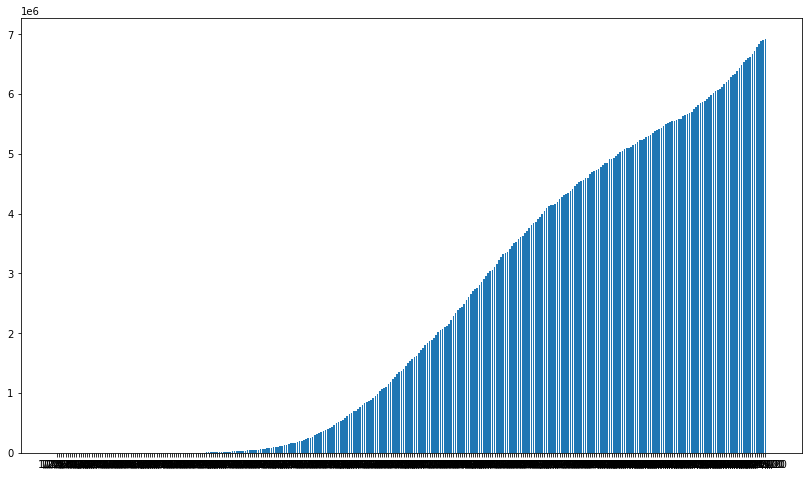

In [11]:
plt.figure(figsize=(14,8))
plt.bar(date, cases)

In [12]:
dados_Brasil = df_pais.loc['Brazil']

In [13]:
dados_Brasil

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
12/10/20    6781799
12/11/20    6836227
12/12/20    6880127
12/13/20    6901952
12/14/20    6927145
Name: Brazil, Length: 328, dtype: int64

# Eliminando números de caso "0"

In [14]:
dados_Brasil = dados_Brasil[dados_Brasil > 0]
dados_Brasil

2/26/20           1
2/27/20           1
2/28/20           1
2/29/20           2
3/1/20            2
             ...   
12/10/20    6781799
12/11/20    6836227
12/12/20    6880127
12/13/20    6901952
12/14/20    6927145
Name: Brazil, Length: 293, dtype: int64

In [15]:
dados_Brasil.index

Index(['2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20',
       '3/3/20', '3/4/20', '3/5/20', '3/6/20',
       ...
       '12/5/20', '12/6/20', '12/7/20', '12/8/20', '12/9/20', '12/10/20',
       '12/11/20', '12/12/20', '12/13/20', '12/14/20'],
      dtype='object', length=293)

In [16]:
dados_Brasil.values

array([      1,       1,       1,       2,       2,       2,       2,
             4,       4,      13,      13,      20,      25,      31,
            38,      52,     151,     151,     162,     200,     321,
           372,     621,     793,    1021,    1546,    1924,    2247,
          2554,    2985,    3417,    3904,    4256,    4579,    5717,
          6836,    8044,    9056,   10360,   11130,   12161,   14034,
         16170,   18092,   19638,   20727,   22192,   23430,   25262,
         28320,   30425,   33682,   36658,   38654,   40743,   43079,
         45757,   50036,   54043,   59324,   63100,   67446,   73235,
         79685,   87187,   92202,   97100,  101826,  108620,  115455,
        126611,  135773,  146894,  156061,  162699,  169594,  178214,
        190137,  203165,  220291,  233511,  241080,  255368,  271885,
        291579,  310087,  330890,  347398,  363211,  374898,  391222,
        411821,  438238,  465166,  498440,  514849,  526447,  555383,
        584016,  614

Text(0, 0.5, 'Valor em milhões')

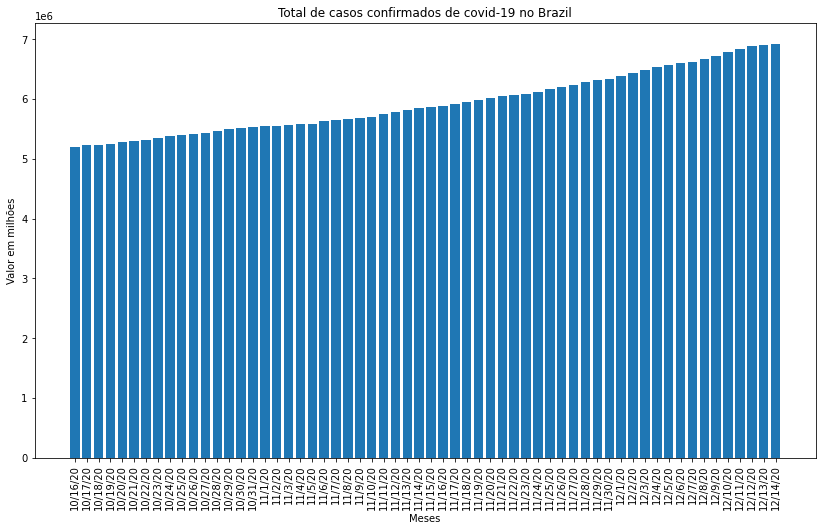

In [17]:
tam = len(dados_Brasil)

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.bar(dados_Brasil.index[tam-60:tam], dados_Brasil.values[tam-60:tam])
plt.title('Total de casos confirmados de covid-19 no Brazil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')

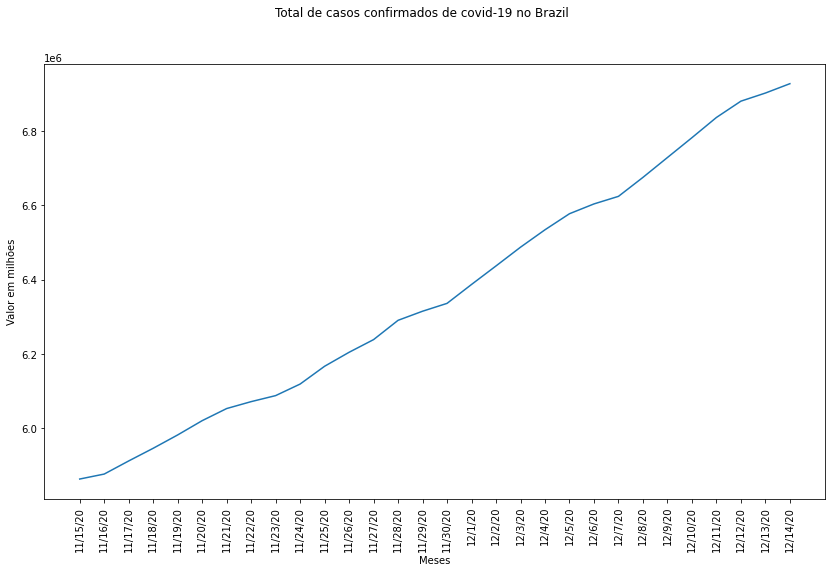

In [18]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.plot(dados_Brasil.index[tam-30:tam], dados_Brasil.values[tam-30:tam])
plt.suptitle('Total de casos confirmados de covid-19 no Brazil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')
plt.show()

# Nova analise com o métedo ARIMA
tendencia, sazonalidade e aleatoridade

In [19]:
dados_Brasil_dois = pd.DataFrame(dados_Brasil).rename_axis('data')
dados_Brasil_dois.head()

,Brazil
data,
2/26/20,1
2/27/20,1
2/28/20,1
2/29/20,2
3/1/20,2


In [20]:
dados_Brasil_dois.reset_index(level=0, inplace=True)
dados_Brasil_dois.head()

,data,Brazil
0,2/26/20,1
1,2/27/20,1
2,2/28/20,1
3,2/29/20,2
4,3/1/20,2


In [21]:
print(dados_Brasil_dois.dtypes)

data      object
Brazil     int64
dtype: object


In [22]:
dados_Brasil_dois['data'] = pd.to_datetime(dados_Brasil_dois['data'])
dados_Brasil_dois.head()

,data,Brazil
0,2020-02-26,1
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,2
4,2020-03-01,2


In [23]:
print(dados_Brasil_dois.dtypes)

data      datetime64[ns]
Brazil             int64
dtype: object


In [24]:
dados = dados_Brasil_dois.set_index('data')
dados.head()

,Brazil
data,
2020-02-26,1
2020-02-27,1
2020-02-28,1
2020-02-29,2
2020-03-01,2


In [25]:
ts = dados['Brazil']
ts.head()

data
2020-02-26    1
2020-02-27    1
2020-02-28    1
2020-02-29    2
2020-03-01    2
Name: Brazil, dtype: int64

In [26]:
decomposicao = seasonal_decompose(ts)

In [27]:
#tendencia
tendencia = decomposicao.trend
tendencia

data
2020-02-26             NaN
2020-02-27             NaN
2020-02-28             NaN
2020-02-29    1.571429e+00
2020-03-01    2.000000e+00
                  ...     
2020-12-10    6.775352e+06
2020-12-11    6.818672e+06
2020-12-12             NaN
2020-12-13             NaN
2020-12-14             NaN
Name: trend, Length: 293, dtype: float64

In [28]:
#sozonalidade
sazonal = decomposicao.seasonal
sazonal

data
2020-02-26    -2310.687904
2020-02-27     3072.974116
2020-02-28     7586.660528
2020-02-29     9915.050772
2020-03-01      -82.273270
                  ...     
2020-12-10     3072.974116
2020-12-11     7586.660528
2020-12-12     9915.050772
2020-12-13      -82.273270
2020-12-14   -10192.377800
Name: seasonal, Length: 293, dtype: float64

In [29]:
#erro
aleatorio = decomposicao.resid
aleatorio

data
2020-02-26            NaN
2020-02-27            NaN
2020-02-28            NaN
2020-02-29   -9914.622200
2020-03-01      82.273270
                 ...     
2020-12-10    3373.597312
2020-12-11    9968.768044
2020-12-12            NaN
2020-12-13            NaN
2020-12-14            NaN
Name: resid, Length: 293, dtype: float64

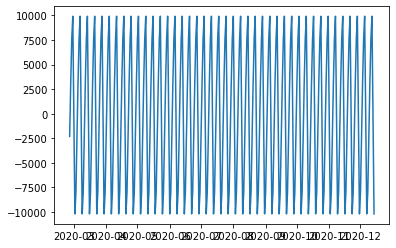

In [30]:
# Visualização de gráfico para cada formato da série temporal
plt.plot(sazonal)

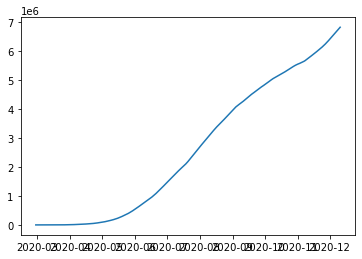

In [31]:
plt.plot(tendencia)

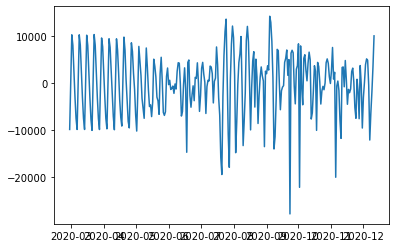

In [32]:
plt.plot(aleatorio)

In [33]:
modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Brazil   No. Observations:                  292
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3126.280
Method:                       css-mle   S.D. of innovations          10750.809
Date:                Tue, 15 Dec 2020   AIC                           6264.561
Time:                        10:03:33   BIC                           6286.621
Sample:                    02-27-2020   HQIC                          6273.397
                         - 12-14-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.669e+04        nan        nan        nan         nan         nan
ar.L1.D.Brazil     0.9576      0.185      5.177      0.000       0.595       1.320
ar.L2.D.Brazil     0.0401      0.185      0.217      0.828      -0.322       0.402
ma.L1.D.Brazil    -0.5651      0.174     -3.242      0.001      -0.907      -0.223
ma.L2.D.Brazil    -0.2830      0.148     -1.912      0.056      -0.573       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0022           +0.0000j            1.0022            0.0000
AR.2          -24.9004           +0.0000j           24.9004            0.5000
MA.1            1.1300           +0.0000j            1.1300            0.0000
MA.2           -3.1266           +0.0000j            3.1266            0.5000
-----------------------------------------------------------------------------
"""

In [34]:
# Previsões de 10 datas no futuro
previsoes = modelo_treinado.forecast(steps = 10)[0]
previsoes

array([6963095.45257723, 7001216.66557384, 7039247.57528831,
       7077278.99283152, 7115307.27818433, 7153332.58446238,
       7191354.91243384, 7229374.26896973, 7267390.66068062,
       7305404.09417219])

Text(0, 0.5, 'Valor em milhões')

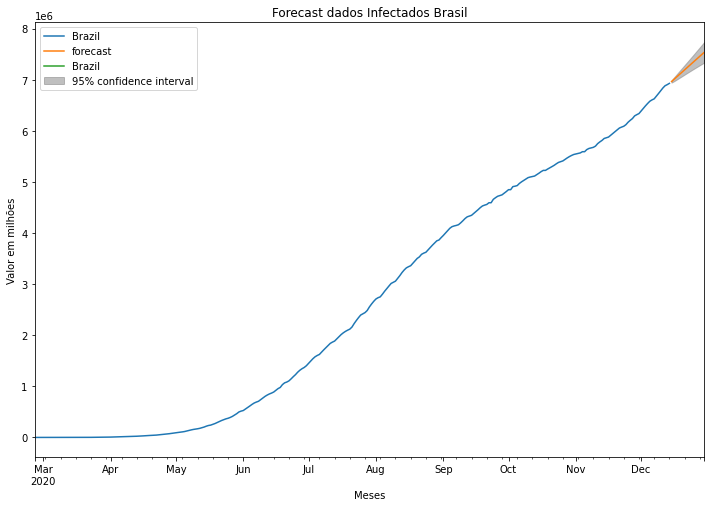

In [36]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = ts.plot(figsize=(12, 8))
modelo_treinado.plot_predict('2020-12-15', '2020-12-30', ax = eixo, plot_insample = True)
plt.title('Forecast dados Infectados Brasil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')

# Nova analise com o métedo auto_ARIMA

In [37]:
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  293
Model:             SARIMAX(3, 2, 3)x(2, 0, [1, 2], 12)   Log Likelihood               -3060.214
Date:                                 Tue, 15 Dec 2020   AIC                           6144.428
Time:                                         10:05:37   BIC                           6188.508
Sample:                                              0   HQIC                          6162.086
                                                 - 293                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    681.4050    419.037      1.626      0.104    -139.893    1502.703
ar.L1          1.0013      0.132      7.567      0.000       0.742       1.261
ar.L2         -0.6938      0.160     -4.332      0.000      -1.008      -0.380
ar.L3         -0.2331      0.127     -1.830      0.067      -0.483       0.017
ma.L1         -1.9311      0.118    -16.335      0.000      -2.163      -1.699
ma.L2          1.7426      0.172     10.144      0.000       1.406       2.079
ma.L3         -0.6306      0.108     -5.842      0.000      -0.842      -0.419
ar.S.L12      -0.2053      0.504     -0.408      0.684      -1.192       0.782
ar.S.L24      -0.9019      0.204     -4.426      0.000      -1.301      -0.502
ma.S.L12       0.1480      0.467      0.317      0.751      -0.767       1.063
ma.S.L24       0.9601      0.234      4.108      0.000       0.502       1.418
sigma2      1.123e+08      0.002   4.99e+10      0.000    1.12e+08    1.12e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               186.19
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):              15.83   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.83e+27. Standard errors may be unstable.
"""

In [38]:
# Visualização dos próximos 10 valores
proximos_10 = modelo_auto.predict(n_periods = 10)
proximos_10 

array([6968463.45951615, 7018886.47710031, 7077759.43599776,
       7127493.08594608, 7166571.58953381, 7197865.16067364,
       7231419.99828566, 7276572.1361438 , 7332730.40550667,
       7388802.95230919])

# Reset para exportar dados

In [39]:
df_pais.reset_index()

,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718
1,Albania,0,0,0,0,0,0,0,0,0,...,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191
2,Algeria,0,0,0,0,0,0,0,0,0,...,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597
3,Andorra,0,0,0,0,0,0,0,0,0,...,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382
4,Angola,0,0,0,0,0,0,0,0,0,...,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vietnam,0,2,2,2,2,2,2,2,2,...,1365,1366,1367,1377,1381,1385,1391,1395,1397,1402
187,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,96098,98038,99758,101109,102992,104879,106622,108099,109738,111102
188,Yemen,0,0,0,0,0,0,0,0,0,...,2304,2337,2383,2078,2079,2081,2082,2083,2083,2084
189,Zambia,0,0,0,0,0,0,0,0,0,...,17898,17916,17931,17963,18062,18091,18161,18217,18274,18322


In [40]:
df_pais.to_csv('dadosCovidPaises.csv')